<a href="https://colab.research.google.com/github/JPLAVALLEY/kaggle/blob/master/House_Prices_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition for House Prices: Advanced Regression Techniques

Use the data in train.csv to predict the sale price in test.csv

Upload my kaggle.json API file

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jplavalley","key":"6b3c042d9370b332481115da40efebc2"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 51.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.2MB/s]


In [0]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

In [6]:
df_train = pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# First lets check for missing values
# Missing values counts in each column

missing_count = (df_train.isnull().sum() / len(df_train)) * 100

# filter to find missing count > 0
missing_count = missing_count[missing_count > 0]

print(missing_count)


LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


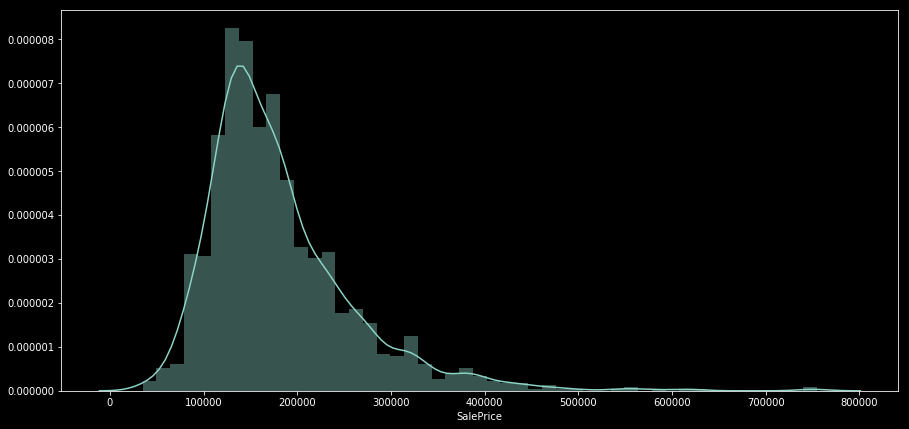

In [37]:
# we need to handle the missing columns

plt.figure(figsize=(15,7))
sns.distplot(df_train['SalePrice'])

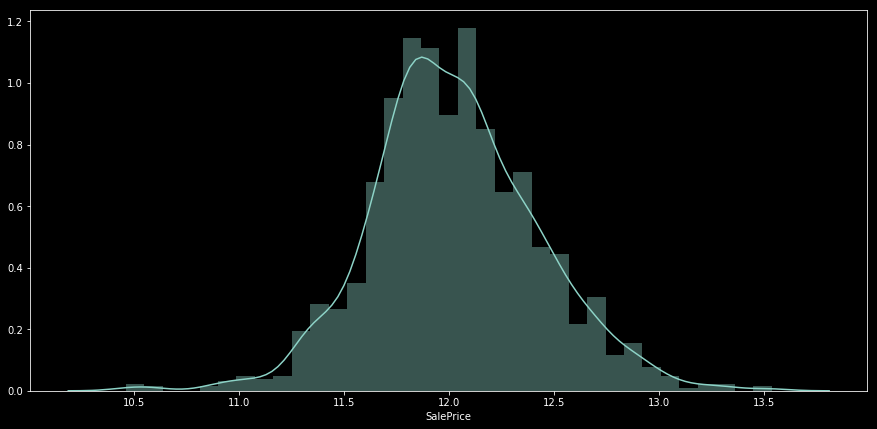

In [38]:
# Our data is not normalized
# Right skewed, many records for low price houses and not many for high price houses
# Most machine learning algorithm works well with data which are normally distributed
#Let's transform the target (SalePrice) variable by taking log scale

target = np.log(df_train['SalePrice'])

plt.figure(figsize=(15,7))
sns.distplot(target)

In [39]:
# this is more normally distributed than our original SalePrice

# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 38 numerical and 43 categorical features in the training data


In [61]:
# Lets make this a function so we can use it later as well
def Num_Cat_Count():
    # Finding numerical features
    numeric_data = df_train.select_dtypes(include = [np.number])

    # Finding categorical features
    categorical_data = df_train.select_dtypes(exclude = [np.number])

    # Let's print how many numerical and categorical features do we have
    print('There are {0} numerical and {1} categorical features in the training data'.\
        format(numeric_data.shape[1], categorical_data.shape[1]))    
    
Num_Cat_Count()

There are 35 numerical and 46 categorical features in the training data


In [40]:
# Correlation plot for the numerical features

# Remove the Id Column from numeric_data
del numeric_data['Id']

numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

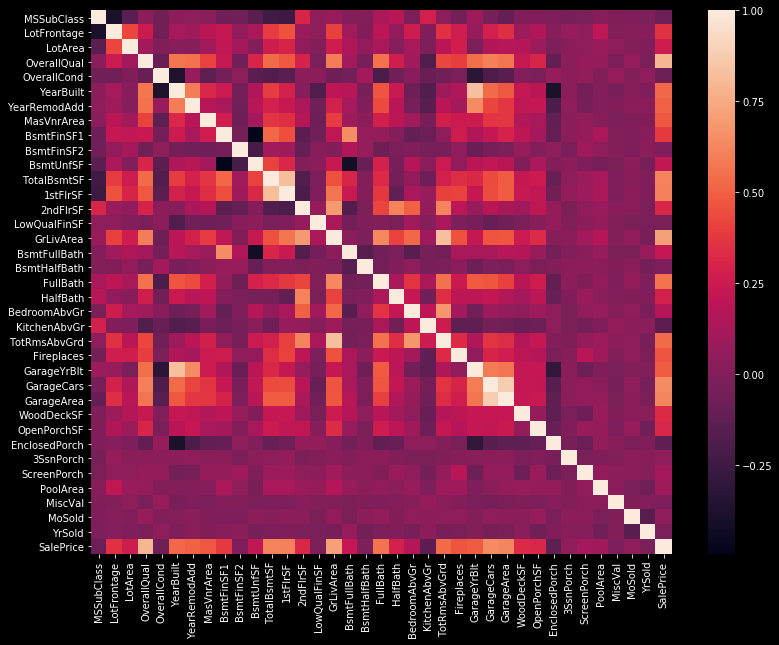

In [41]:
# Correlation plot of the feature in numeric_data

corr = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(13,10))
sns.heatmap(corr)

# Lighter color means greater correlation

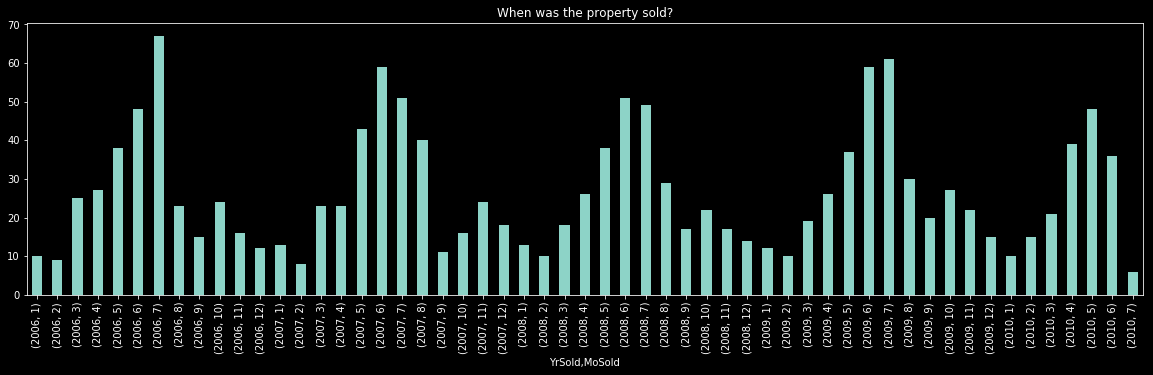

In [49]:
# When was the property sold in which year and month

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(20,5))
plt.title('When was the property sold?')
plt.show()

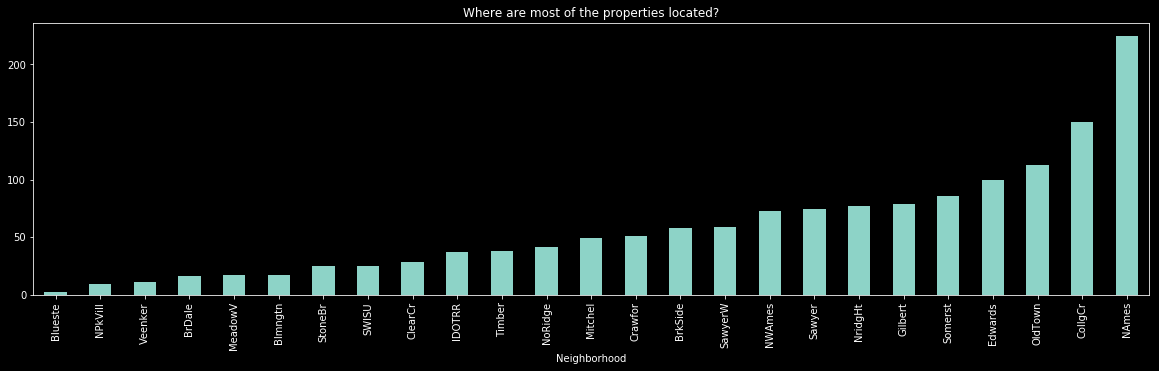

In [53]:
# Where are the properties located?

df_train.groupby('Neighborhood').Id.count(). \
    sort_values().\
    plot(kind='bar', figsize=(20,5))
plt.title('Where are most of the properties located?')
plt.show()

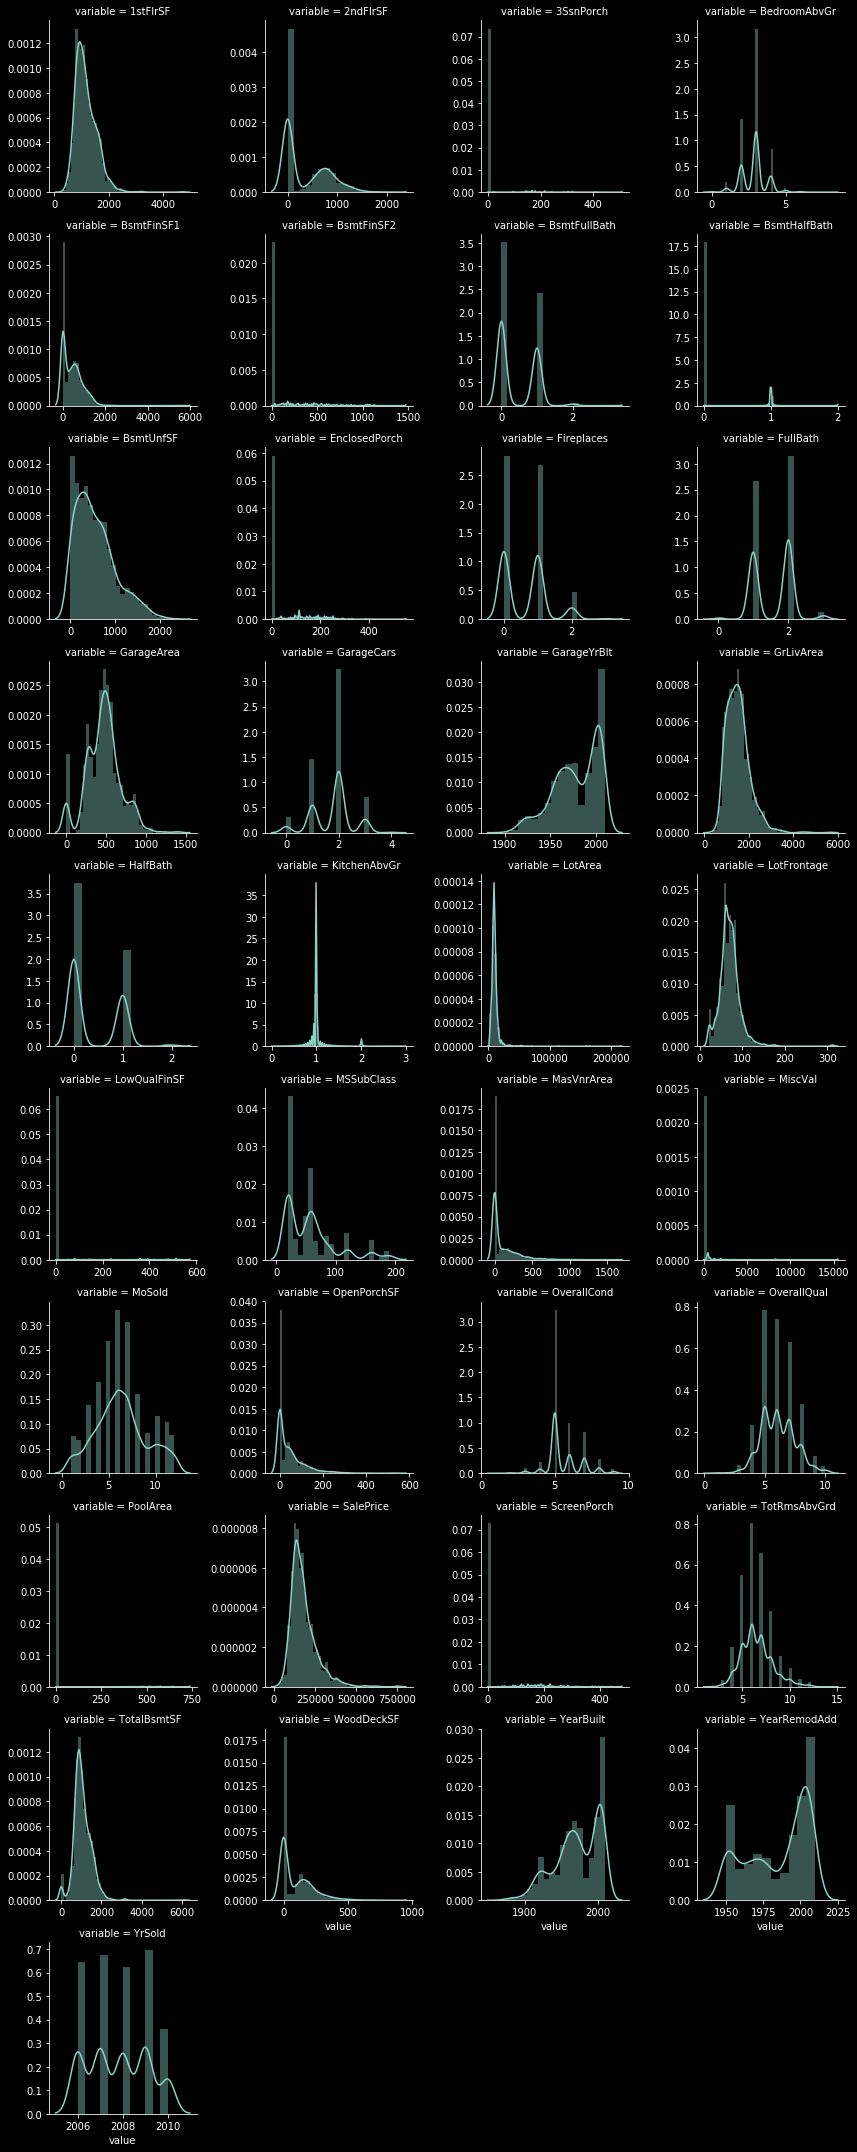

In [56]:
# Distribution of numerical features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
# Conversion from Numeric Feature to Category features

df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [60]:
Num_Cat_Count()

There are 35 numerical and 46 categorical features in the training data


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


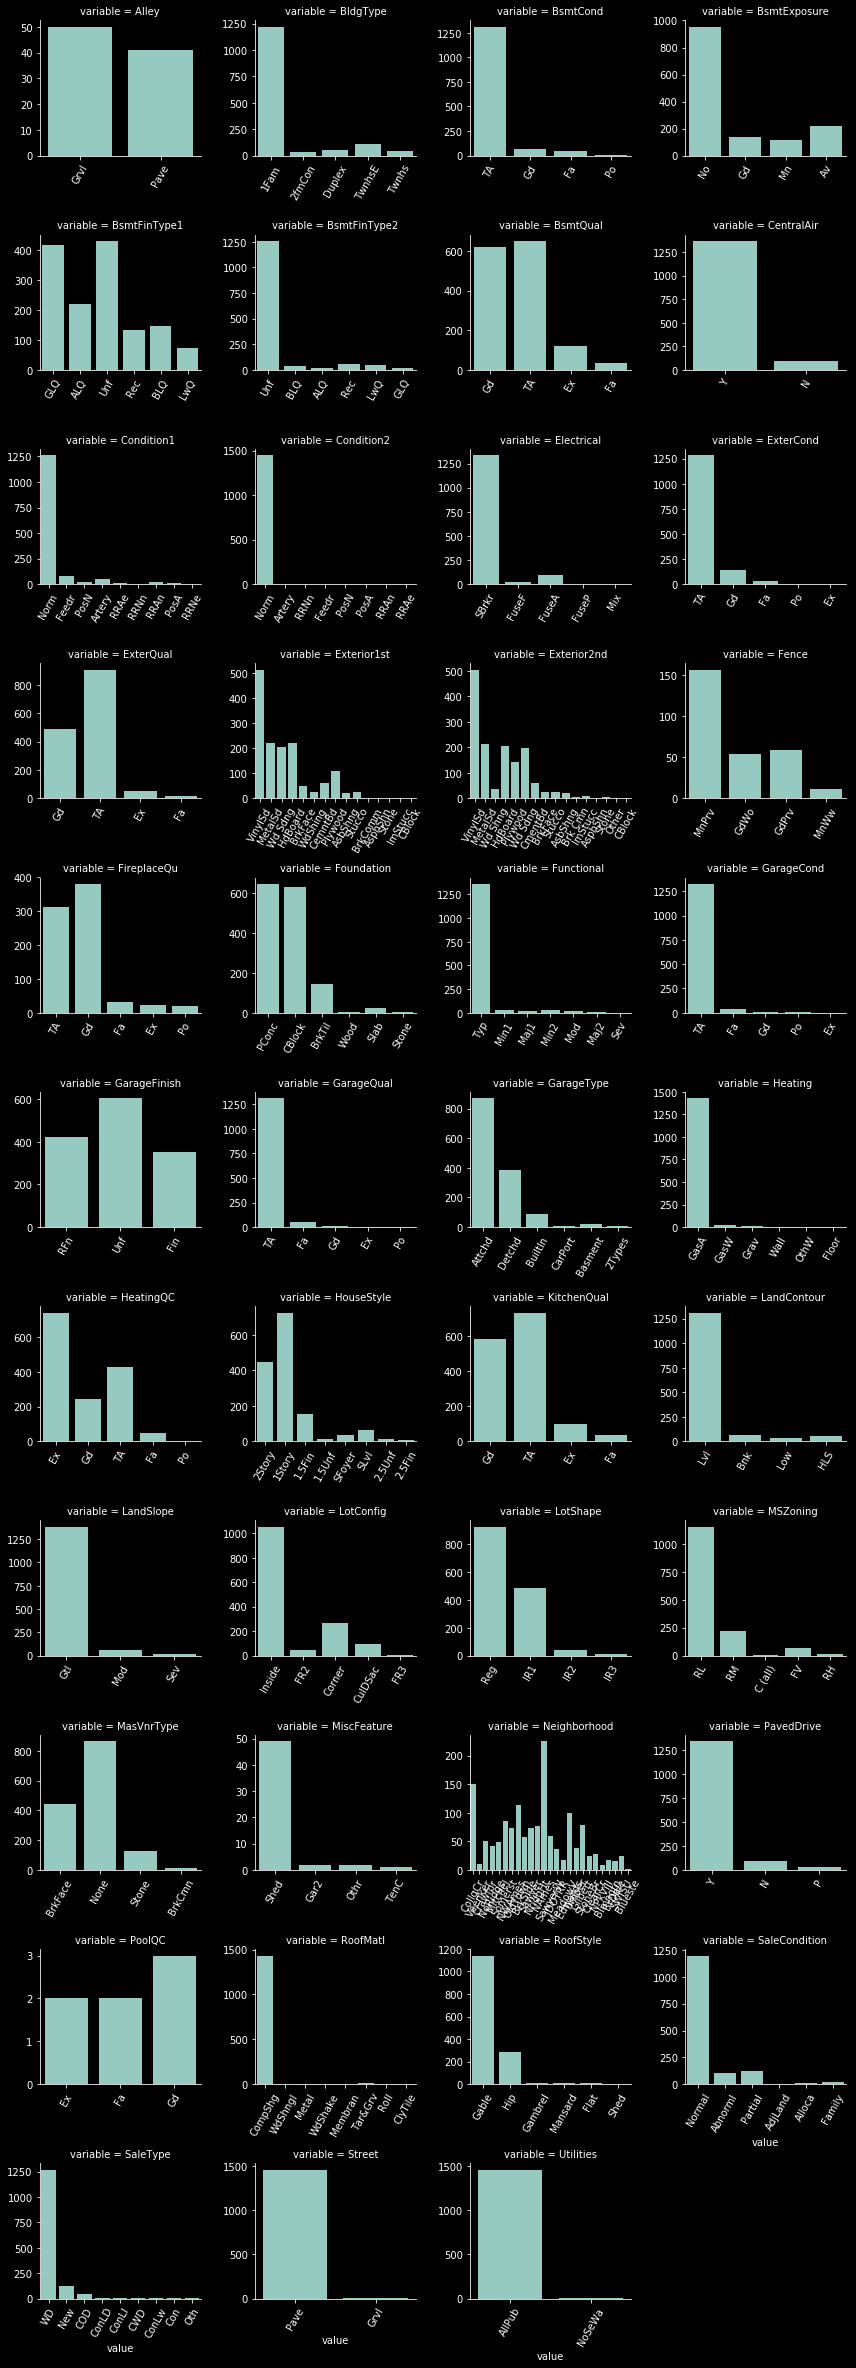

In [66]:
# Let's get a plot count of categorical features

f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()
